Loading and Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\IMDB Dataset.csv')
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\HP\AppData\Local\Temp\ipykernel_6020\2770513261.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('E:\IMDB Dataset.csv')


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [4]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Text Preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [6]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Display cleaned reviews
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


Feature Extraction (TF-IDF)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert sentiment to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform train data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

Train shape: (40000, 5000)
Test shape: (10000, 5000)


Machine Learning Model (Logistic Regression)

Accuracy: 0.8852

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



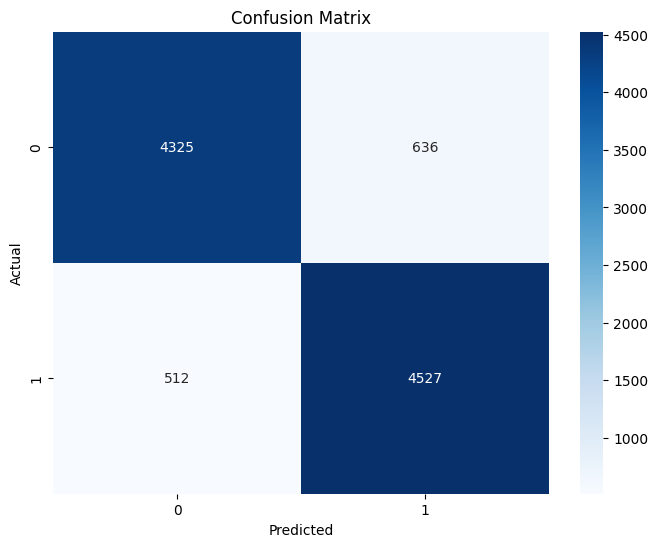

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Deep Learning Model (LSTM)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 280ms/step - accuracy: 0.5062 - loss: 0.6923 - val_accuracy: 0.5486 - val_loss: 0.6828
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.6246 - loss: 0.6310 - val_accuracy: 0.8410 - val_loss: 0.3876
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 274ms/step - accuracy: 0.8689 - loss: 0.3344 - val_accuracy: 0.8761 - val_loss: 0.2940
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.9244 - loss: 0.2122 - val_accuracy: 0.8777 - val_loss: 0.3159
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 220ms/step - accuracy: 0.9503 - loss: 0.1537 - val_accuracy: 0.8777 - val_loss: 0.3340


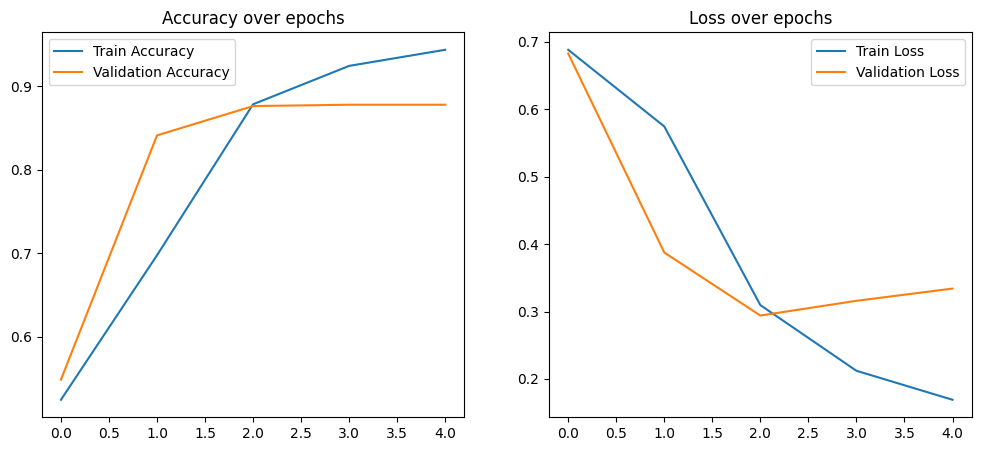

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4961
           1       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Build LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=64
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# Evaluate model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Saving the Models

In [10]:
import joblib
import pickle

# Save logistic regression model
joblib.dump(lr_model, 'logistic_regression_model.pkl')

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save LSTM model
model.save('lstm_model.h5')

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

Creating a Prediction Function

In [14]:
def predict_sentiment(text, model_type='lr'):
    # Clean the text
    cleaned_text = clean_text(text)
    
    if model_type == 'lr':
        # Load TF-IDF and LR model
        with open('tfidf_vectorizer.pkl', 'rb') as f:
            tfidf = pickle.load(f)
        model = joblib.load('logistic_regression_model.pkl')
        
        # Transform and predict
        text_tfidf = tfidf.transform([cleaned_text])
        prediction = model.predict(text_tfidf)[0]
    else:
        # Load tokenizer and LSTM model
        with open('tokenizer.pkl', 'rb') as f:
            tokenizer = pickle.load(f)
        model = tf.keras.models.load_model('lstm_model.h5')
        
        # Tokenize, pad, and predict
        seq = tokenizer.texts_to_sequences([cleaned_text])
        pad = pad_sequences(seq, maxlen=max_len)
        prediction = (model.predict(pad) > 0.5).astype(int)[0][0]
    
    return 'positive' if prediction == 1 else 'negative'

# Test the function
test_review = "Terrible movie. Waste of time and money."
print(predict_sentiment(test_review))  # Should output 'positive'

test_review = "This movie was fantastic! I loved every minute of it."
print(predict_sentiment(test_review))  # Should output 'negative'

negative
positive
